In [1]:
import numpy as np 
from time import sleep 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import warnings
warnings.simplefilter('ignore')
import plotly.express as px


In [2]:
df=pd.read_csv("../data/preproces_data.csv")
df.head(10)
df=df.loc[df['Diện tích']>0]
df=df.loc[df['Giá']>0]
df

,Giá,Diện tích,Số phòng ngủ,Số toilet,Địa chỉ nhà,Ngày đăng tin,Ngày hết hạn,Mã tin,Quận,Đường,Lượt xem
0,6.5,14.0,0,0,"Dự án The Prince Residence, Đường Nguyễn Văn T...",2023-06-23,2023-07-08,9122,Quận Phú Nhuận,Đường Nguyễn Văn Trỗi,35
1,8.0,68.0,2,2,"Dự án Q7 Saigon Riverside, Đường Đào Trí, Phườ...",2023-06-16,2023-07-01,8478,Quận 7,Đường Đào Trí,74
2,1.3,30.0,0,0,"Đường D5, Phường 25, Bình Thạnh, Hồ Chí Minh",2023-08-07,2023-08-22,11591,Quận Bình Thạnh,Đường D5,88
3,10.0,80.0,2,2,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Hồ Chí Minh",2023-06-16,2023-07-01,8580,Quận 8,Đường Tạ Quang Bửu,48
4,35.0,120.0,5,4,"178A Đường Phan Đăng Lưu, Phường 3, Phú Nhuận,...",2023-03-16,2023-03-31,4467,Quận Phú Nhuận,Đường Phan Đăng Lưu,30
...,...,...,...,...,...,...,...,...,...,...,...
14847,22.0,76.0,5,4,"128A Đường Bành Văn Trân, Phường 7, Tân Bình, ...",2023-05-17,2023-06-01,6623,Quận Tân Bình,Đường Bành Văn Trân,57
14848,8.0,66.0,2,2,"Dự án Q7 Saigon Riverside, Đường Đào Trí, Phườ...",2023-06-16,2023-07-01,8479,Quận 7,Đường Đào Trí,77
14850,11.0,125.0,0,0,"Đường Thạnh Xuân 25, Phường Thạnh Xuân, Quận 1...",2023-07-17,2023-08-01,10408,Quận 12,Đường Thạnh Xuân 25,72
14851,16.0,300.0,0,0,"Đường Nguyễn Ảnh Thủ, Phường Hiệp Thành, Quận ...",2023-08-25,2023-09-09,12585,Quận 12,Đường Nguyễn Ảnh Thủ,66


In [16]:
df.shape

(13289, 13)

## Question : Sự ảnh hưởng của giá nhà theo đường và quận

**Ý nghĩa:** 
* Cho biết nếu bạn muốn thuê nhà ở quận và đường nào với chi phí phù hợp với mình

### Ảnh hưởng của giá nhà theo quận

**Các bước thực hiện:**
* Thể hiện phân bố giá thuê nhà phổ biến bằng histogram (tần suất) 
* Thể hiện phân bố giá thuê nhà phổ biến bằng boxplot (phân vị)
* So sánh giá thuê nhà theo quận

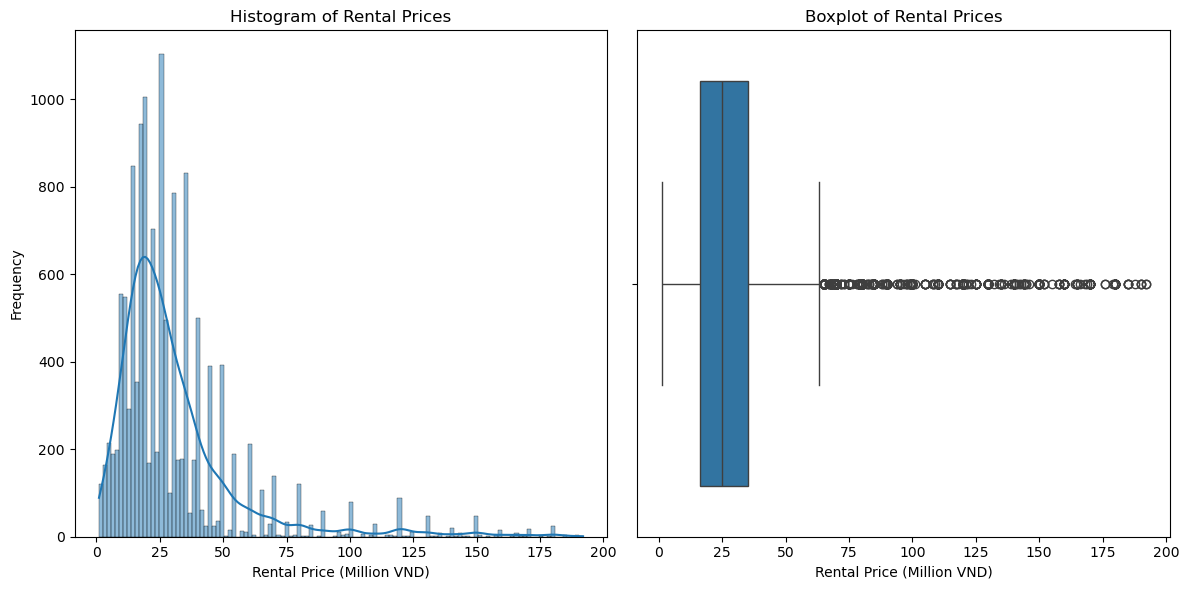

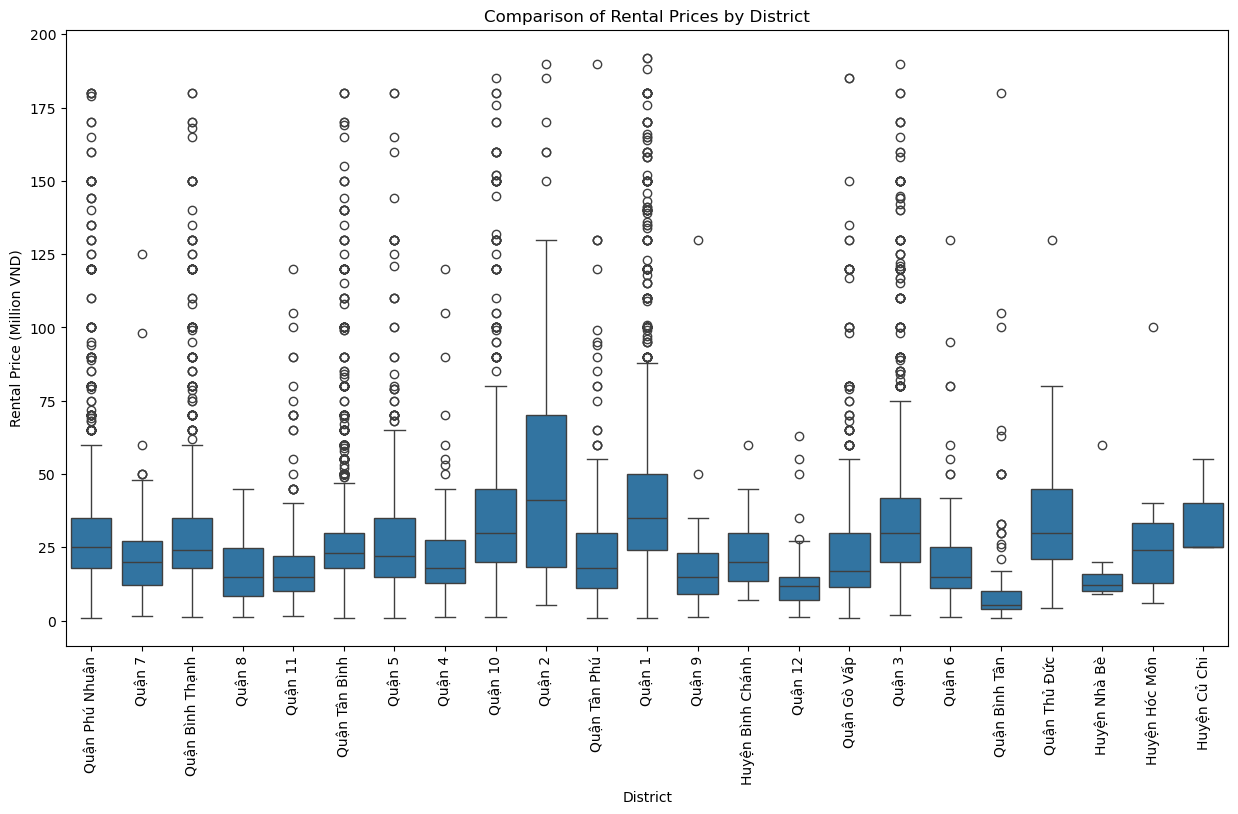

In [4]:
# Thể hiện phân bố giá thuê nhà phổ biến bằng histogram (tần suất)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Giá'], kde=True)
plt.title('Histogram of Rental Prices')
plt.xlabel('Rental Price (Million VND)')
plt.ylabel('Frequency')

# Thể hiện phân bố giá thuê nhà phổ biến bằng boxplot (phân vị)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Giá'])
plt.title('Boxplot of Rental Prices')
plt.xlabel('Rental Price (Million VND)')

plt.tight_layout()
plt.show()
# So sánh giá thuê nhà theo quận
plt.figure(figsize=(15, 8))
sns.boxplot(x='Quận', y='Giá', data=df)
plt.title('Comparison of Rental Prices by District')
plt.xlabel('District')
plt.ylabel('Rental Price (Million VND)')
plt.xticks(rotation=90)
plt.show()


* Biểu đồ trên thể hiện giá nhà xuất hiện nhiều nhất khoảng 4 triệu - 50 triệu chiếm phần lớn
* Biểu đồ dưới thể hiện sự phân bố giá nhà theo từng quận trong đó trung vị Q2 của các quận hầu như đều nằm lệch hơn so với 1 phía cho thấy được sự chênh lệch của giá nhà từng quận 

### Ảnh hưởng của giá nhà theo đường trong quận

Các bước thực hiện:
* Drop những giá đường bị NaN
* Lọc data theo quận, đường với giá thuê trung bình
* Visualize top 3 đường có giá cao nhất

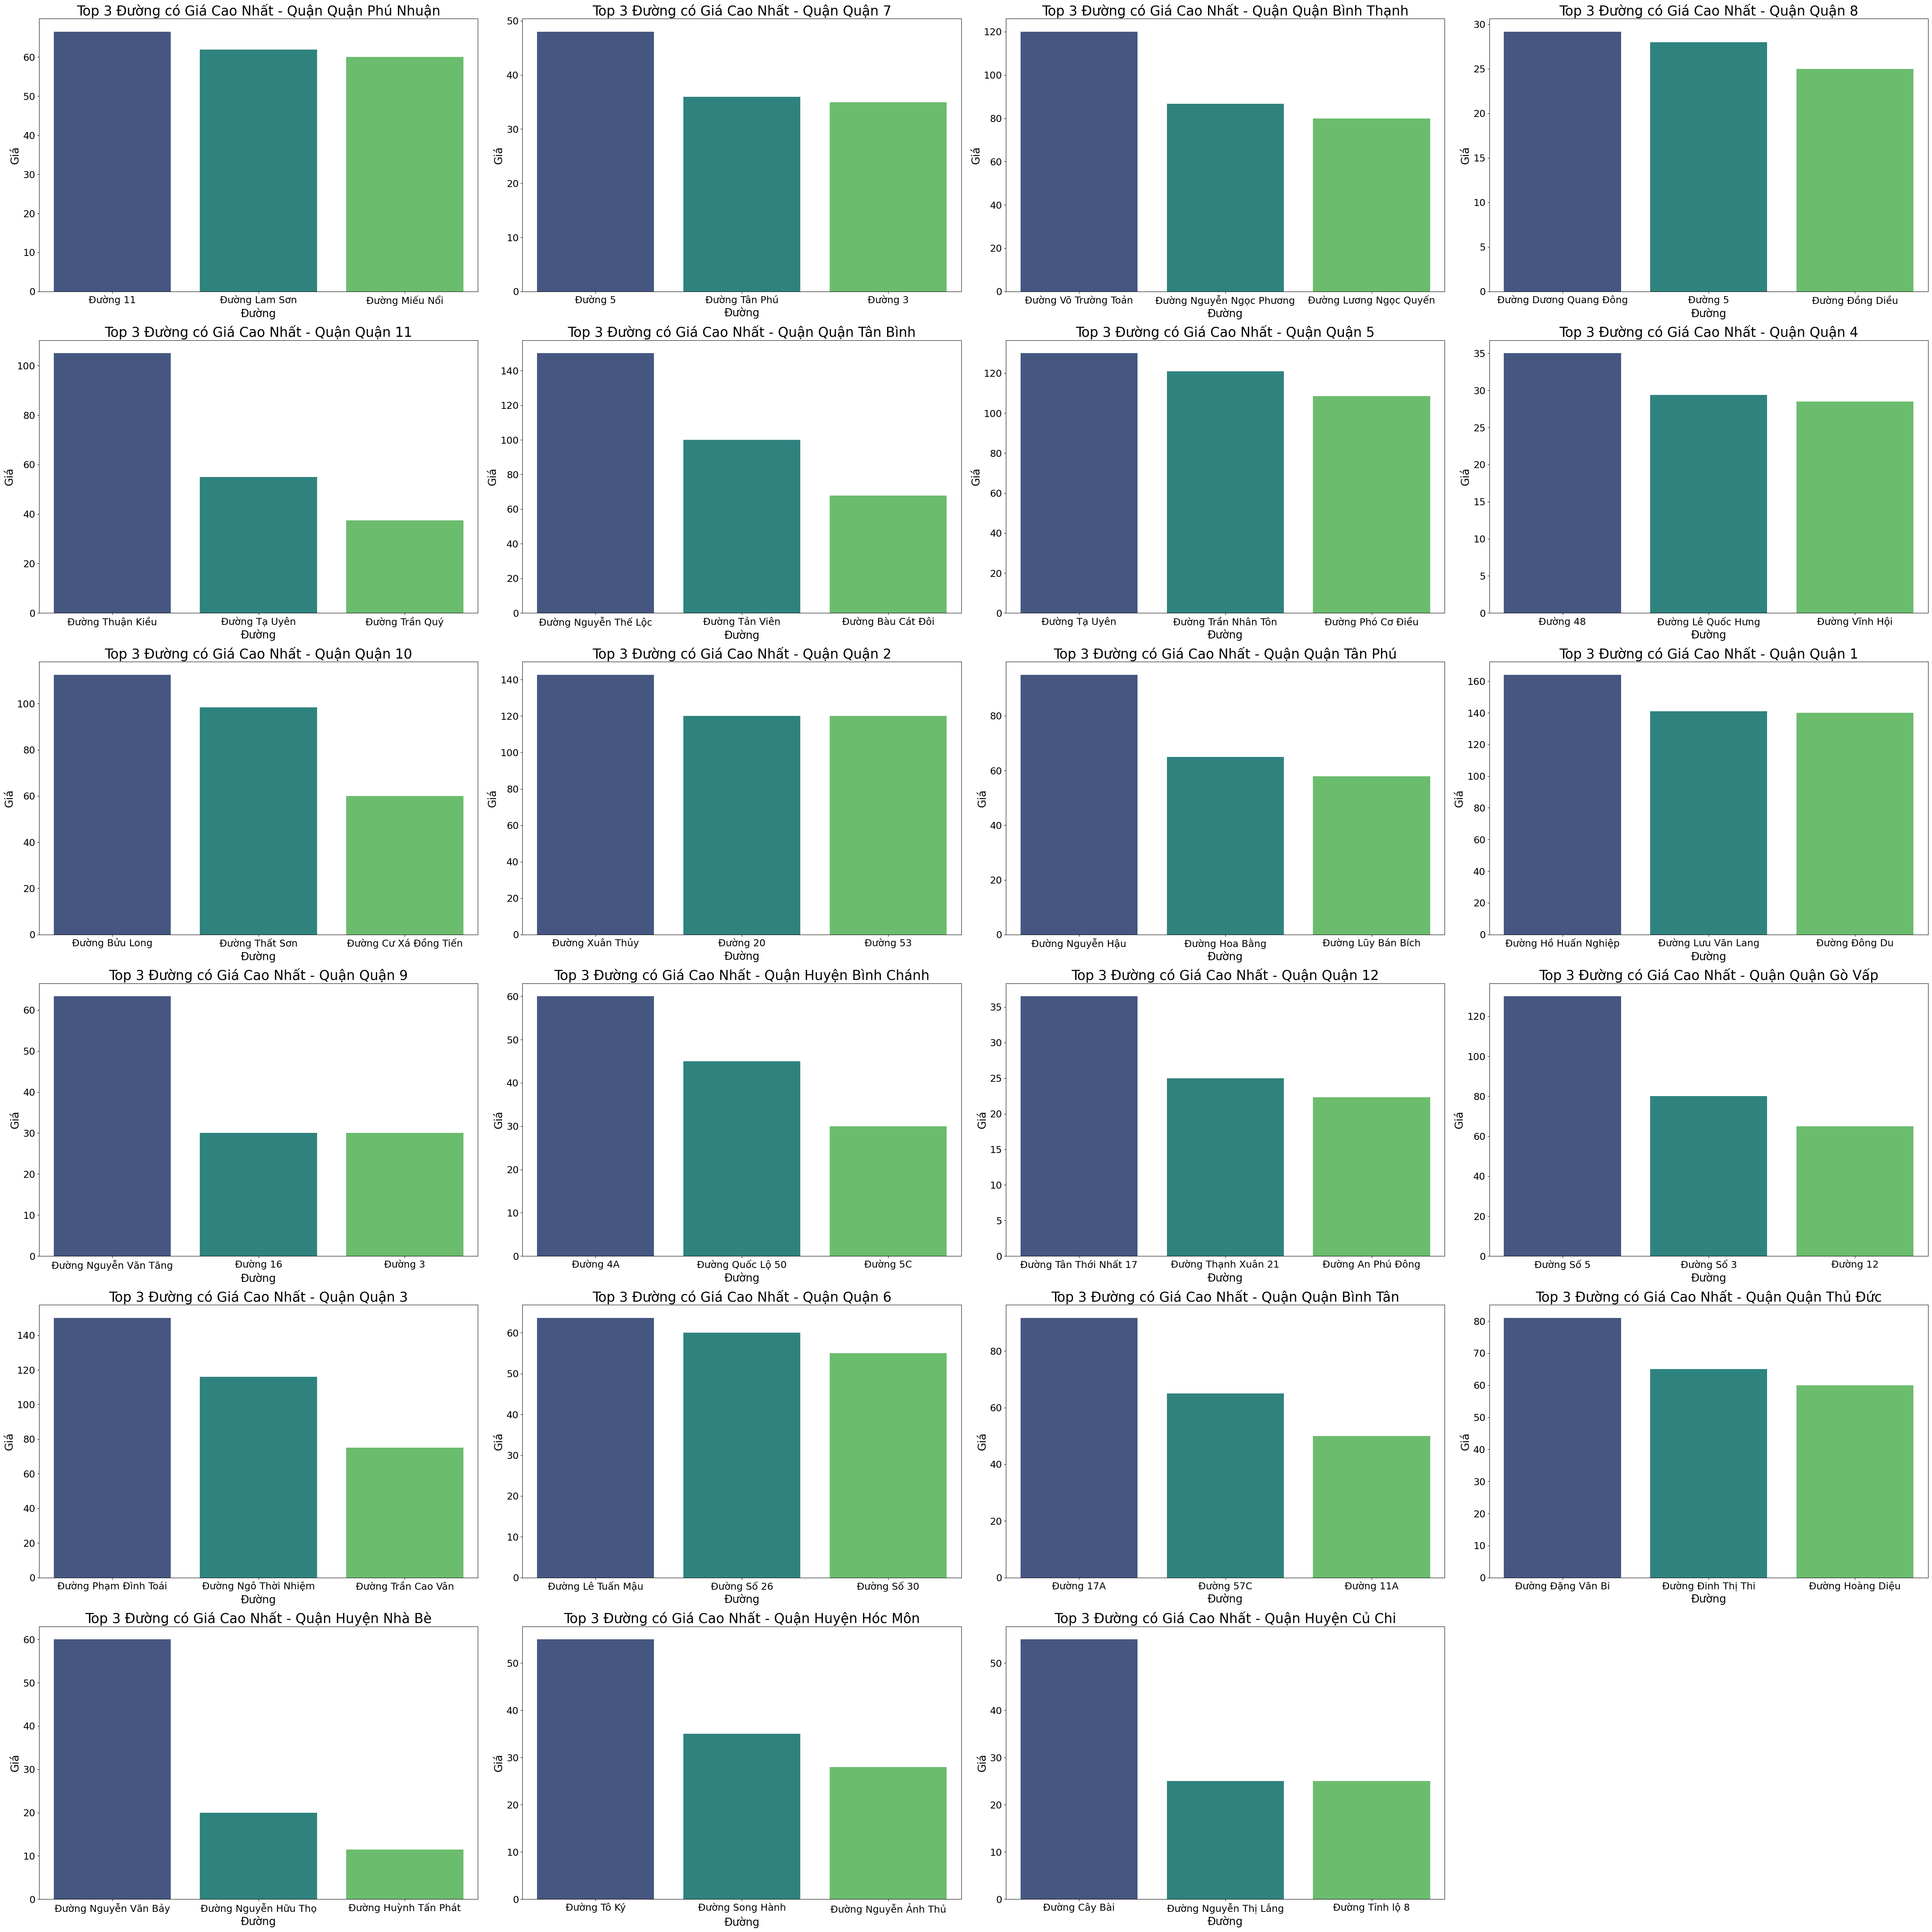

In [5]:
#drop những giá đường bị NaN
df= df.dropna(subset=['Đường'])
#Lọc data theo quận
def filter_by_district(dataframe, district_name):
    return dataframe[dataframe['Quận'] == district_name]

# Lọc theo quận và đường với giá trung bình
def filter_by_district_and_average_price(dataframe, district_name):
    filtered_by_district = filter_by_district(dataframe, district_name)
    return filtered_by_district.groupby('Đường')['Giá'].mean().reset_index()
#Visualize top 3 đường có giá cao nhất
def plot_top3_by_district(dataframe, district_name, ax):
    filtered_data = filter_by_district_and_average_price(dataframe, district_name)
    top3_data = filtered_data.nlargest(3, 'Giá')  
    sns.barplot(x='Đường', y='Giá', data=top3_data, palette='viridis', ax=ax)
    ax.set_title(f"Top 3 Đường có Giá Cao Nhất - Quận {district_name}",size=25)
    ax.set_xlabel('Đường',fontsize=20)
    ax.set_ylabel('Giá',fontsize=20)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

# Tạo figure và axes với ma trận 6x4
fig, axes = plt.subplots(6, 4, figsize=(50, 50))

# Vẽ bar chart cho từng quận
districts = df['Quận'].unique()
for i in range(6):
    for j in range(4):
        if i * 4 + j < len(districts):
            plot_top3_by_district(df, districts[i * 4 + j], axes[i, j])
        else:
            # Nếu không còn quận nào để vẽ, ẩn axes đi
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


* Biểu đồ cho thấy những "đất vàng" trong các quận với nhau
* Các đường top của quận 1 có mức giá lớn nhất trong tất cả các quận vì là nơi tập trung nhiều cơ quan chính quyền, các lãnh sự quán các nước và các tòa nhà cao tầng của thành phố

## Question : Sự phân bố lượt đăng tin thuê nhà ở các quận trong thành phố Hồ Chí Minh

**Ý nghĩa:**
1. Dự báo nhu cầu và giá nhà:
    * Dữ liệu về sự phân bố thuê nhà cung cấp thông tin hữu ích để dự đoán nhu cầu trong tương lai và ảnh hưởng đến giá nhà. Điều này có thể hỗ trợ nhà đầu tư và người mua nhà trong việc đưa ra quyết định thông tin.
2. Nghiên cứu thị trường bất động sản: 
    * Câu hỏi này có thể giúp hiểu rõ hơn về sự phân phối của lượt đăng tin thuê nhà ở các quận trong thành phố Hồ Chí Minh. Điều này có thể cung cấp thông tin quan trọng về sự quan tâm và nhu cầu của người dân đối với các khu vực cụ thể.


### Các bước thực hiện: 


**Bước 1: Đọc file map Việt Nam lv2 (Theo Quận) lưu lại thành 1 geodataframe**

<Axes: >

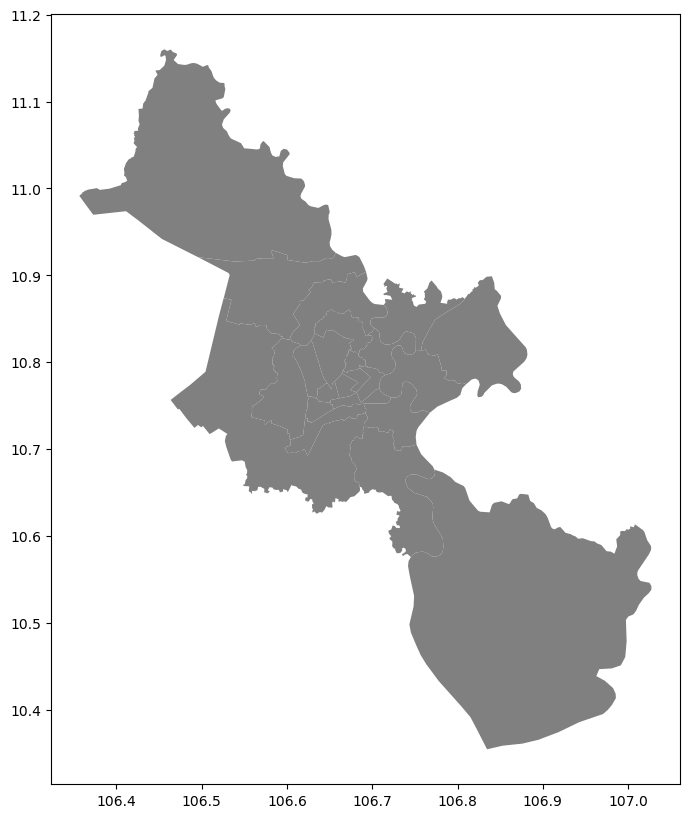

In [6]:
#Đọc file map Việt Nam lv2 (Theo Quận)
fp = "../data/process/gadm41_VNM_shp/gadm41_VNM_2.shp"
quan_gdf = gpd.read_file(fp)
# Lấy các thuộc tính là HCM city từ cột NAME_1 ở geodataframe 
tp_hcm_gdf = quan_gdf[quan_gdf['NAME_1'] == 'Hồ Chí Minh']
fig, ax = plt.subplots(figsize=(15, 10))
tp_hcm_gdf.plot(ax=ax, color='gray')

**Bước 2: Kiểm tra các tên quận** 

In [7]:
# Kiểm tra các tên quận
tp_hcm_gdf['NAME_2']

307    Bình Chánh
308      Bình Tân
309    Bình Thạnh
310       Cần Giờ
311        Củ Chi
312        Gò Vấp
313       Hóc Môn
314        Nhà Bè
315     Phú Nhuận
316        Quận 1
317       Quận 10
318       Quận 11
319       Quận 12
320        Quận 2
321        Quận 3
322        Quận 4
323        Quận 5
324        Quận 6
325        Quận 7
326        Quận 8
327        Quận 9
328      Tân Bình
329       Tân Phú
330       Thủ Đức
Name: NAME_2, dtype: object

**Bước 3: Đếm số lượng đăng ký ở các quận lưu lại thành 1 data frame**

In [8]:
# Đếm số lượng đăng ký ở các quận 
so_luong_theo_quan = df['Quận'].value_counts()
#Lưu lại thành dataframe
df_so_luong_theo_quan = pd.DataFrame({'Quan': so_luong_theo_quan.index, 'SoLuong': so_luong_theo_quan.values})
df_so_luong_theo_quan

,Quan,SoLuong
0,Quận Tân Bình,2522
1,Quận Phú Nhuận,2419
2,Quận 10,1449
3,Quận 3,1417
4,Quận Bình Thạnh,1315
5,Quận 1,1161
6,Quận Gò Vấp,512
7,Quận 5,314
8,Quận 11,310
9,Quận 7,297


**Bước 4: Xử lý nếu có tên quận không trùng với dataframe**

In [9]:
# Xử lý tên các Quận để trùng với tên các quận ở geodataframe
ten_quan_mapping = {
    'Quận Tân Bình': 'Tân Bình',
    'Quận Phú Nhuận': 'Phú Nhuận',
    'Quận 3': 'Quận 3',
    'Quận 10': 'Quận 10',
    'Quận Bình Thạnh': 'Bình Thạnh',
    'Quận 1': 'Quận 1',
    'Quận Gò Vấp': 'Gò Vấp',
    'Quận 11': 'Quận 11',
    'Quận 5': 'Quận 5',
    'Quận 7': 'Quận 7',
    'Quận 9': 'Quận 9',
    'Quận 12': 'Quận 12',
    'Quận Tân Phú': 'Tân Phú',
    'Quận 4': 'Quận 4',
    'Quận 8': 'Quận 8',
    'Quận 6': 'Quận 6',
    'Quận 2': 'Quận 2',
    'Quận Bình Tân': 'Bình Tân',
    'Quận Thủ Đức': 'Thủ Đức',
    'Huyện Bình Chánh': 'Bình Chánh',
    'Huyện Hóc Môn': 'Hóc Môn',
    'Huyện Nhà Bè': 'Nhà Bè',
    'Huyện Củ Chi': 'Củ Chi'
}
df_so_luong_theo_quan1 = df_so_luong_theo_quan.set_index('Quan')
df_so_luong_theo_quan1.transpose()
df_so_luong_theo_quan1 = df_so_luong_theo_quan1.rename(index=ten_quan_mapping)
df_so_luong_theo_quan1

,SoLuong
Quan,
Tân Bình,2522
Phú Nhuận,2419
Quận 10,1449
Quận 3,1417
Bình Thạnh,1315
Quận 1,1161
Gò Vấp,512
Quận 5,314
Quận 11,310


**Bước 5: Merge 2 cái geodataframe và dataframe tạo thành 1 geodataframe mới**

In [10]:
#Đổi tên cột NAME_2 thành quận ở geodataframe
tp_hcm_gdf2 = tp_hcm_gdf[['NAME_2', 'geometry']]
tp_hcm_gdf2 = tp_hcm_gdf2.rename(columns={'NAME_2': 'Quan'})
tp_hcm_gdf2 =tp_hcm_gdf2.set_index('Quan')
# merge 2 cái geodataframe và dataframe tạo thành 1 geodataframe mới
tp_hcm_gdf3 = tp_hcm_gdf2.merge(df_so_luong_theo_quan1, on = 'Quan')
tp_hcm_gdf3 

,geometry,SoLuong
Quan,,
Bình Chánh,"POLYGON ((106.66338 10.64014, 106.66248 10.639...",14
Bình Tân,"POLYGON ((106.60394 10.71734, 106.60010 10.717...",115
Bình Thạnh,"POLYGON ((106.70638 10.79165, 106.70049 10.793...",1315
Củ Chi,"POLYGON ((106.61709 10.98810, 106.62196 10.984...",3
Gò Vấp,"POLYGON ((106.69205 10.81754, 106.69131 10.815...",512
Hóc Môn,"POLYGON ((106.53220 10.89754, 106.53293 10.900...",10
Nhà Bè,"POLYGON ((106.78344 10.58790, 106.78268 10.581...",7
Phú Nhuận,"POLYGON ((106.66808 10.78890, 106.66687 10.789...",2419
Quận 1,"POLYGON ((106.68401 10.75948, 106.68336 10.761...",1161


**Bước 6: Visualize geodataframe**

<Figure size 10000x10000 with 0 Axes>

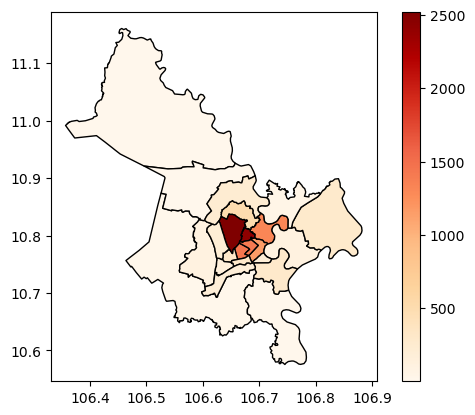

In [11]:
# Visualize geodataframe
plt.figure(figsize=(100, 100))
tp_hcm_gdf3.plot(column = 'SoLuong', cmap = 'OrRd', legend = True, edgecolor='black')
plt.show()

Qua biểu đồ ta thấy được:
* Số lượng đăng tin ở trung tâm thành phố là nhiều nhất càng ra xa thì nhạt dần
* Quận Bình Tân với Quận Phú Nhuận có lượt đăng tin thuê nhà là nhiều nhất


## Question 2: Tổng số lượt view mỗi tháng trong năm 2023

**Ý nghĩa:** 
* Điều này giúp theo dõi sự quan tâm và tương tác của người đọc với thông tin thuê nhà qua từng tháng trong năm nói đó. Thông tin này có thể hữu ích để đánh giá xu hướng và hiệu suất của tin đăng trong khoảng thời gian đó.

### Các bước thực hiện:

**Bước 1: Format lại date_time**

In [12]:
#Tạo bản copy dataframe
df_copy=df
#Format lại date_time
df_copy['Ngày đăng tin'] = pd.to_datetime(df_copy['Ngày đăng tin'], format='%Y-%m-%d')
df_copy['Ngày hết hạn'] = pd.to_datetime(df_copy['Ngày hết hạn'], format='%Y-%m-%d')
#Tạo thêm cột Năm
df_copy['Năm'] = df_copy['Ngày hết hạn'].dt.year
#Tạo thêm cột Tháng_Năm
df_copy['Tháng_Năm'] = df_copy['Ngày hết hạn'].dt.to_period('M')
df_copy

,Giá,Diện tích,Số phòng ngủ,Số toilet,Địa chỉ nhà,Ngày đăng tin,Ngày hết hạn,Mã tin,Quận,Đường,Lượt xem,Năm,Tháng_Năm
0,6.50,14.00,0,0,"Dự án The Prince Residence, Đường Nguyễn Văn T...",2023-06-23,2023-07-08,9122,Quận Phú Nhuận,Đường Nguyễn Văn Trỗi,35,2023,2023-07
1,8.00,68.00,2,2,"Dự án Q7 Saigon Riverside, Đường Đào Trí, Phườ...",2023-06-16,2023-07-01,8478,Quận 7,Đường Đào Trí,74,2023,2023-07
2,1.30,30.00,0,0,"Đường D5, Phường 25, Bình Thạnh, Hồ Chí Minh",2023-08-07,2023-08-22,11591,Quận Bình Thạnh,Đường D5,88,2023,2023-08
3,10.00,80.00,2,2,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Hồ Chí Minh",2023-06-16,2023-07-01,8580,Quận 8,Đường Tạ Quang Bửu,48,2023,2023-07
4,35.00,120.00,5,4,"178A Đường Phan Đăng Lưu, Phường 3, Phú Nhuận,...",2023-03-16,2023-03-31,4467,Quận Phú Nhuận,Đường Phan Đăng Lưu,30,2023,2023-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,22.00,76.00,5,4,"128A Đường Bành Văn Trân, Phường 7, Tân Bình, ...",2023-05-17,2023-06-01,6623,Quận Tân Bình,Đường Bành Văn Trân,57,2023,2023-06
14848,8.00,66.00,2,2,"Dự án Q7 Saigon Riverside, Đường Đào Trí, Phườ...",2023-06-16,2023-07-01,8479,Quận 7,Đường Đào Trí,77,2023,2023-07
14850,11.00,125.00,0,0,"Đường Thạnh Xuân 25, Phường Thạnh Xuân, Quận 1...",2023-07-17,2023-08-01,10408,Quận 12,Đường Thạnh Xuân 25,72,2023,2023-08
14851,16.00,300.00,0,0,"Đường Nguyễn Ảnh Thủ, Phường Hiệp Thành, Quận ...",2023-08-25,2023-09-09,12585,Quận 12,Đường Nguyễn Ảnh Thủ,66,2023,2023-09


**Bước 2: Lấy năm 2023 để tính tổng lượt view theo tháng**

In [13]:
#Lấy năm 2023 để tính tổng lượt view theo tháng
df_2023=df_copy[df_copy['Năm'] == 2023]
tong_luot_xem_theo_thang = df_2023.groupby('Tháng_Năm')['Lượt xem'].sum()
tong_luot_xem_theo_thang = pd.DataFrame({'Tháng_Năm': tong_luot_xem_theo_thang.index, 'Số View': tong_luot_xem_theo_thang.values})
tong_luot_xem_theo_thang['Tháng_Năm'] = tong_luot_xem_theo_thang['Tháng_Năm'].dt.to_timestamp()
tong_luot_xem_theo_thang

,Tháng_Năm,Số View
0,2023-01-01,9163
1,2023-02-01,16176
2,2023-03-01,48311
3,2023-04-01,41004
4,2023-05-01,70020
5,2023-06-01,42461
6,2023-07-01,97339
7,2023-08-01,82265
8,2023-09-01,61970
9,2023-10-01,50016


**Bước 3: Visualize kết quả**

In [14]:
#Visualize kết quả
fig = px.line(tong_luot_xem_theo_thang,
              x = "Tháng_Năm", y = "Số View")
fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=1000, 
                  height=400)

Qua biểu đồ ta thấy được:
* Ở tháng 1 và tháng 2 có số lượt view nhỏ nhất so với mọi tháng trong năm
* Số lượt view tăng không đều đạt đỉnh tại tháng sáu, qua tháng sáu lượt view giảm dần